Cluster Analysis for Ad Conversions Data

Content
The data used in this project is from an anonymous organisation’s social media ad campaign. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import chi2_contingency
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from kneed import KneeLocator
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('KAG_conversion_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [9]:
X = pd.get_dummies(df, columns=['age','gender'])
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


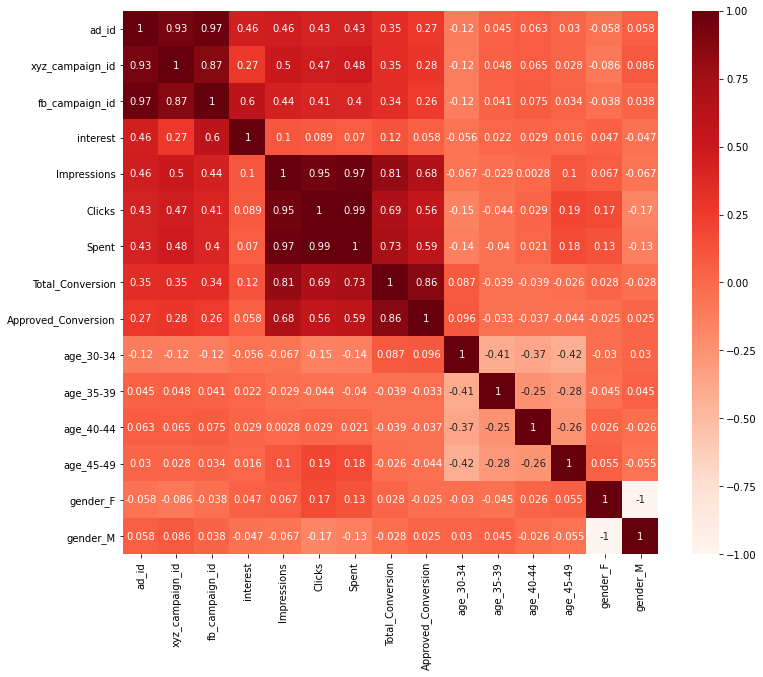

In [10]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
X_new = X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest'], axis=1)
X_new

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


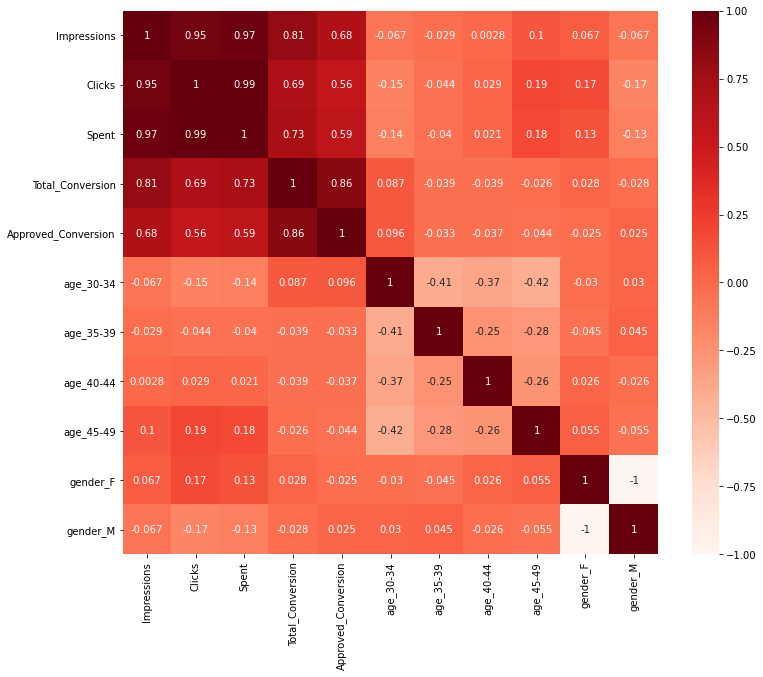

In [12]:
plt.figure(figsize=(12,10))
cor = X_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We dropped the columns because they had unique values and for data cleaning, we did not require the data

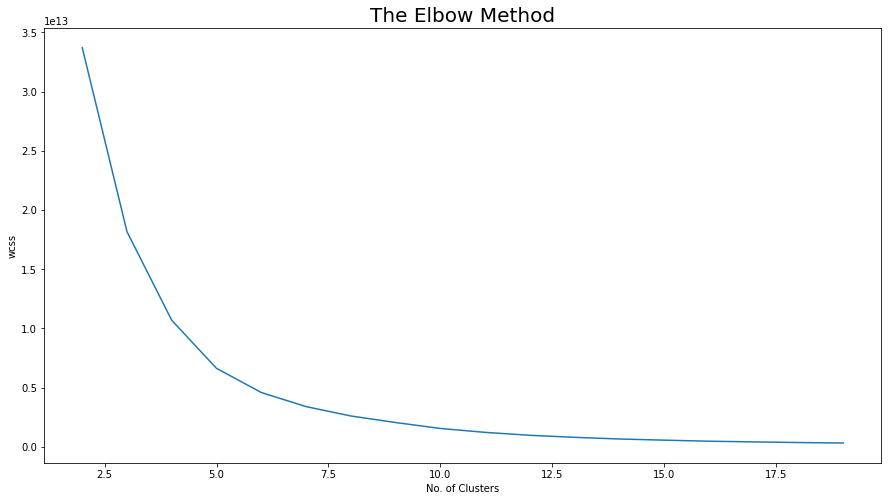

In [13]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_new)
    wcss.append(km.inertia_)
    
import plotly.express as px  
plt.figure(figsize = (15,8))
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


k = 5

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
Xfeatures = X_new

In [15]:
km.fit(Xfeatures)

KMeans(n_clusters=5)

In [16]:
y_means = km.fit_predict(Xfeatures)
y_means

array([0, 0, 0, ..., 4, 2, 2])

In [17]:
Advert_Type = km.labels_

In [18]:
y_means is km.labels_

True

In [20]:
df['Advert_Type'] = Advert_Type.tolist()
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,2
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,4
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,2


<AxesSubplot:xlabel='age', ylabel='Approved_Conversion'>

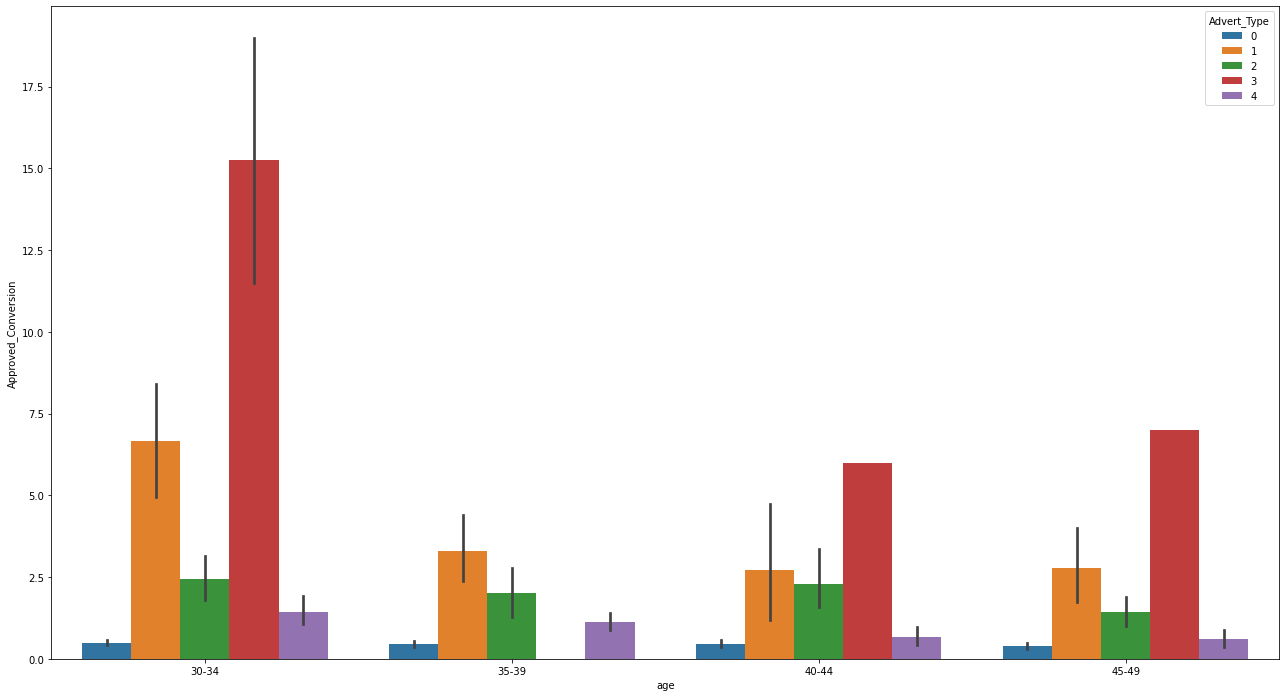

In [21]:
plt.gcf().set_size_inches(22,12, forward= True)
sns.barplot(x="age", y="Approved_Conversion", hue="Advert_Type", data=df)

advert type 3 led to the highest number of sales but lacked consistency among all the age brackets but advert type 4 had a higher sale count compared to the rest while demonstrating consistency among customers of all ages.

<AxesSubplot:xlabel='gender', ylabel='Spent'>

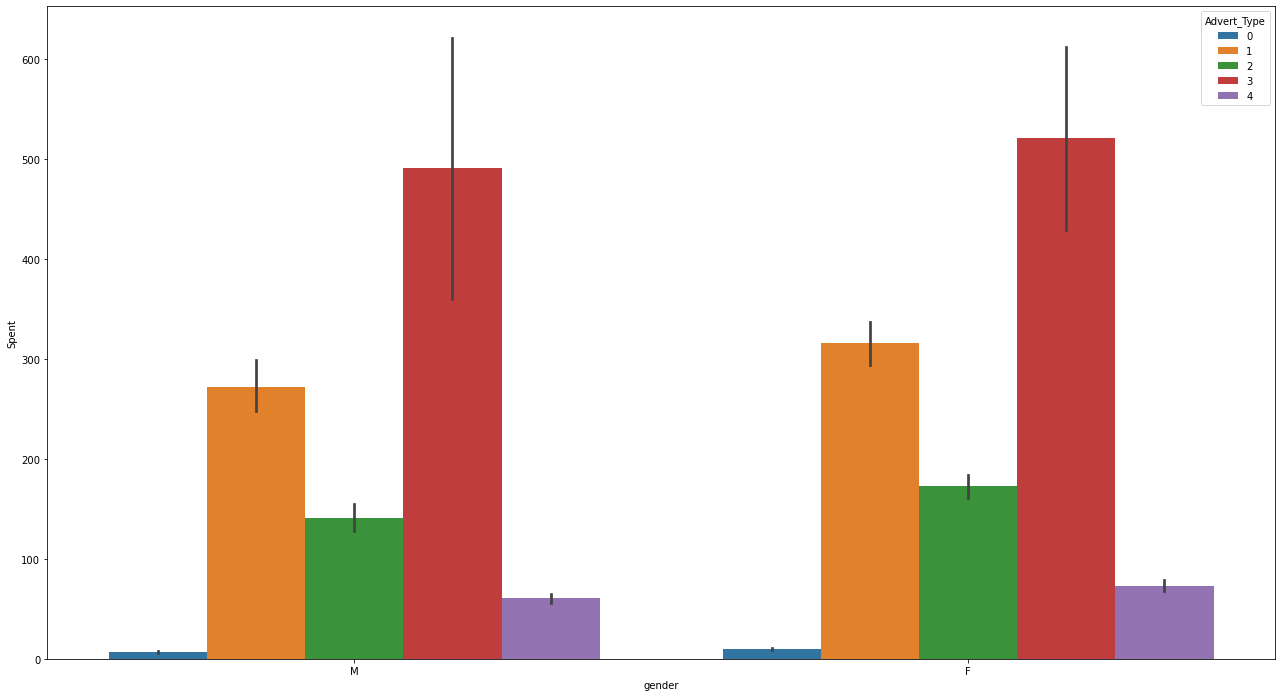

In [23]:
plt.gcf().set_size_inches(22,12, forward= True)
sns.barplot(x="gender", y="Spent", hue="Advert_Type", data=df)

No. Company xyz has no bias in their ad spending based on gender. Therefore it is possible their products are gender neutral.

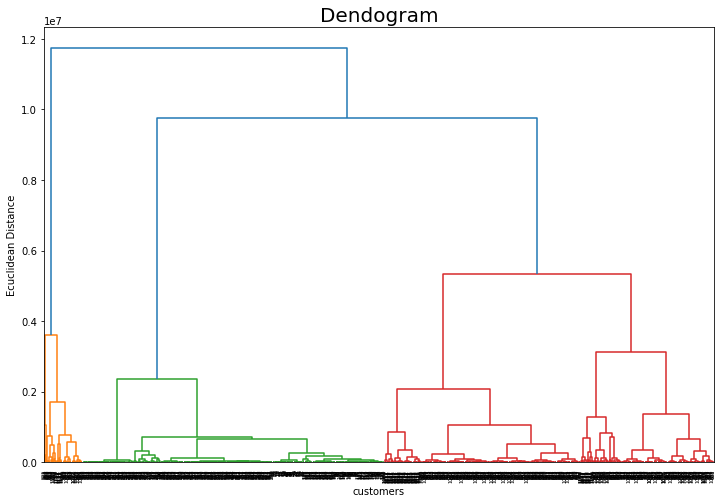

In [30]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), orientation = 'top')
plt.title('Dendogram', fontsize= 20)
plt.xlabel('customers')
plt.ylabel('Ecuclidean Distance')
plt.show()